In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df_movie = pd.read_csv('IMDb Movies India.csv',engine='python',encoding='Latin-1')

In [6]:
df_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_movie.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [8]:
df_movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [9]:
df_movie.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [10]:
df_movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
df_movie.isnull().sum().sum()

33523

In [12]:
df_movie.shape

(15509, 10)

In [13]:
df_movie["Year"].head()


0       NaN
1    (2019)
2    (2021)
3    (2019)
4    (2010)
Name: Year, dtype: object

In [14]:

genre = df_movie['Genre']

In [15]:

genre.head(11)

0                         Drama
1                         Drama
2                Drama, Musical
3               Comedy, Romance
4                         Drama
5        Comedy, Drama, Musical
6           Drama, Romance, War
7                   Documentary
8     Horror, Mystery, Thriller
9       Action, Crime, Thriller
10                        Drama
Name: Genre, dtype: object

In [16]:
genres = df_movie['Genre'].str.split(', ', expand=True)

In [17]:

genres.head(11)

,0,1,2
0,Drama,None,None
1,Drama,None,None
2,Drama,Musical,None
3,Comedy,Romance,None
4,Drama,None,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
7,Documentary,None,None
8,Horror,Mystery,Thriller
9,Action,Crime,Thriller


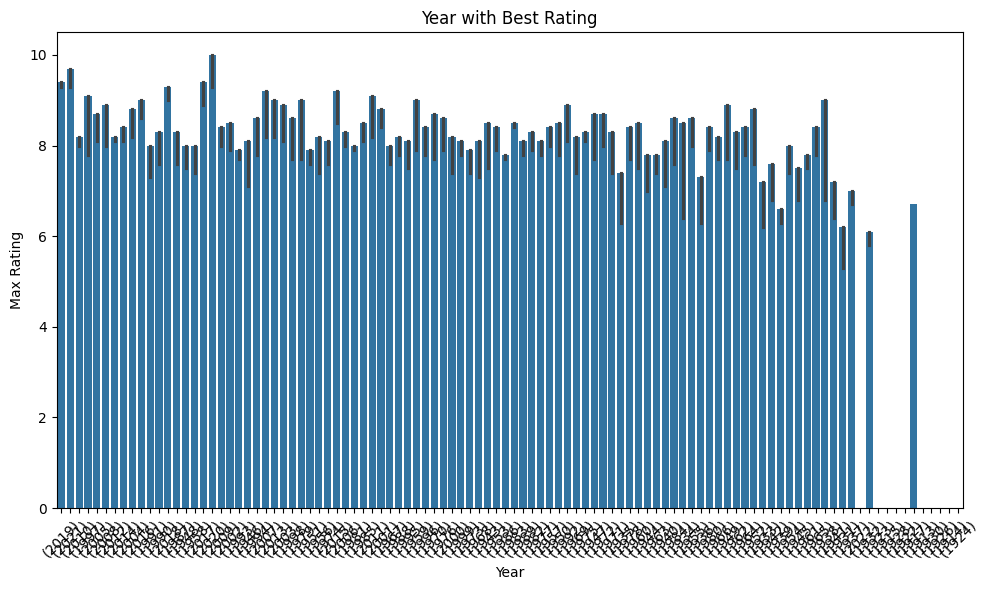

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_movie, x='Year', y='Rating', estimator=max)
plt.xlabel('Year')
plt.ylabel('Max Rating')
plt.title('Year with Best Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items(), key=lambda x: str(x[0]))}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 3543
Adventure: 541
Animation: 125
Biography: 208
Comedy: 2029
Crime: 1322
Documentary: 383
Drama: 7243
Family: 943
Fantasy: 458
History: 207
Horror: 524
Music: 90
Musical: 589
Mystery: 513
News: 9
Reality-TV: 3
Romance: 2449
Sci-Fi: 58
Short: 1
Sport: 70
Thriller: 1713
War: 47
Western: 5
nan: 5631


TypeError: '<' not supported between instances of 'str' and 'float'

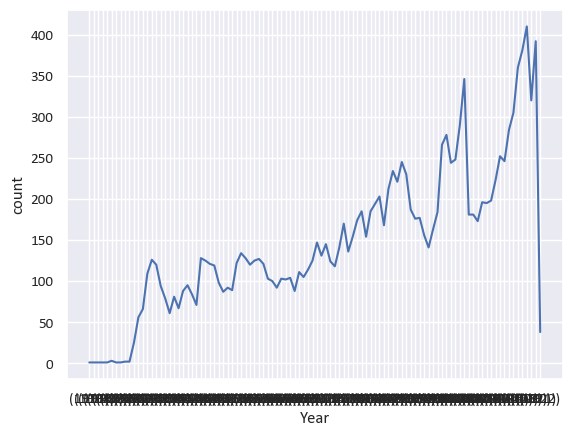

In [20]:
sns.set(style = "darkgrid", font = "Calibri")
ax = sns.lineplot(data=df_movie['Year'].value_counts().sort_index())
darkgrid_positions = range(min(df_movie['Year']), max(df_movie['Year']) + 1, 5)
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_darkgrid(darkgrid_positions)
ax.set_darkgridlabels(darkgrid_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel("Count")
mpl.show()

In [21]:
top_10_movies = df_movie.nlargest(10,'Rating')
print("Top 10 movies by rating: ")
print(top_10_movies)

Top 10 movies by rating: 
                      Name    Year Duration             Genre  Rating Votes  \
8339       Love Qubool Hai  (2020)   94 min    Drama, Romance    10.0     5   
5410            Half Songs  (2021)   79 min    Music, Romance     9.7     7   
2563                 Breed  (2020)      NaN             Drama     9.6    48   
5077          Gho Gho Rani  (2019)  105 min  History, Romance     9.4    47   
6852                  June  (2021)   93 min             Drama     9.4    18   
11704             Ram-Path  (2017)      NaN       Documentary     9.4     5   
14222  The Reluctant Crime  (2020)  113 min             Drama     9.4    16   
1314          Ashok Vatika  (2018)   97 min             Drama     9.3     7   
1729              Baikunth  (2021)   72 min            Family     9.3    29   
5125           God of gods  (2019)   90 min       Documentary     9.3    46   

              Director            Actor 1          Actor 2  \
8339   Saif Ali Sayeed          Ahaan Jha 

In [22]:
top_movies = df_movie.nlargest(10, 'Rating')
print("Top 10 movies by rating:")
print(top_movies)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='rating_column', y='Movie_Title', data=top_10_movies, palette='viridis')
plt.xlabel('Rating') 
plt.ylabel('Movie Title')  
plt.title('Top 10 Movies Overall')  
plt.show()

Top 10 movies by rating:
                      Name    Year Duration             Genre  Rating Votes  \
8339       Love Qubool Hai  (2020)   94 min    Drama, Romance    10.0     5   
5410            Half Songs  (2021)   79 min    Music, Romance     9.7     7   
2563                 Breed  (2020)      NaN             Drama     9.6    48   
5077          Gho Gho Rani  (2019)  105 min  History, Romance     9.4    47   
6852                  June  (2021)   93 min             Drama     9.4    18   
11704             Ram-Path  (2017)      NaN       Documentary     9.4     5   
14222  The Reluctant Crime  (2020)  113 min             Drama     9.4    16   
1314          Ashok Vatika  (2018)   97 min             Drama     9.3     7   
1729              Baikunth  (2021)   72 min            Family     9.3    29   
5125           God of gods  (2019)   90 min       Documentary     9.3    46   

              Director            Actor 1          Actor 2  \
8339   Saif Ali Sayeed          Ahaan Jha  

ValueError: Could not interpret value `rating_column` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [23]:
print(df_movie.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


C:\Users\USER\AppData\Local\Temp\ipykernel_4808\1554161125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_movie, x='Year', palette='viridis')


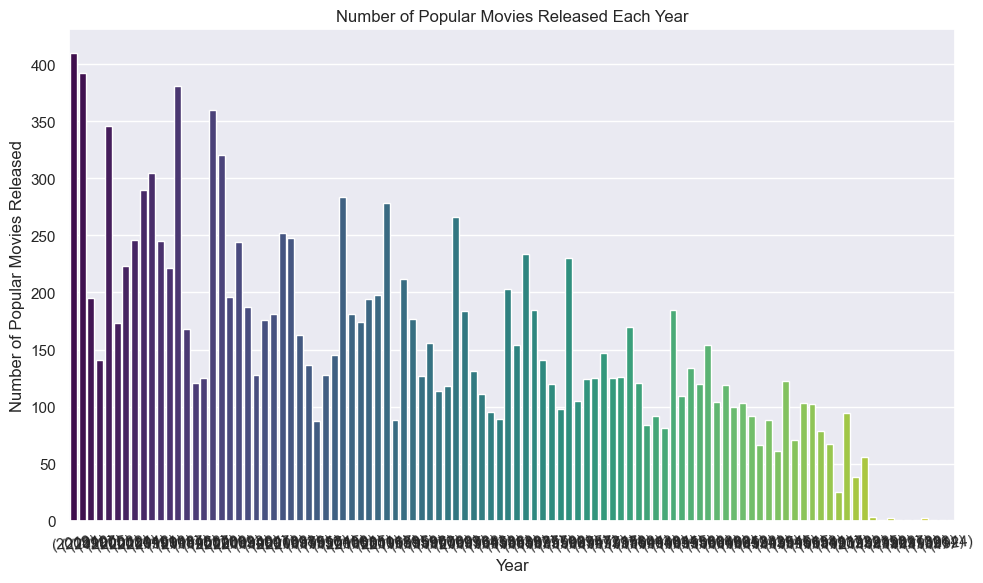

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_movie, x='Year', palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Popular Movies Released')
plt.title('Number of Popular Movies Released Each Year')
plt.xticks(rotation=6)  
plt.tight_layout() 
plt.show()

In [25]:
df_movie['Votes'] = pd.to_numeric(df_movie['Votes'],errors='coerce')
df_movie.dropna(subset=['Rating', 'Votes'], inplace=True)

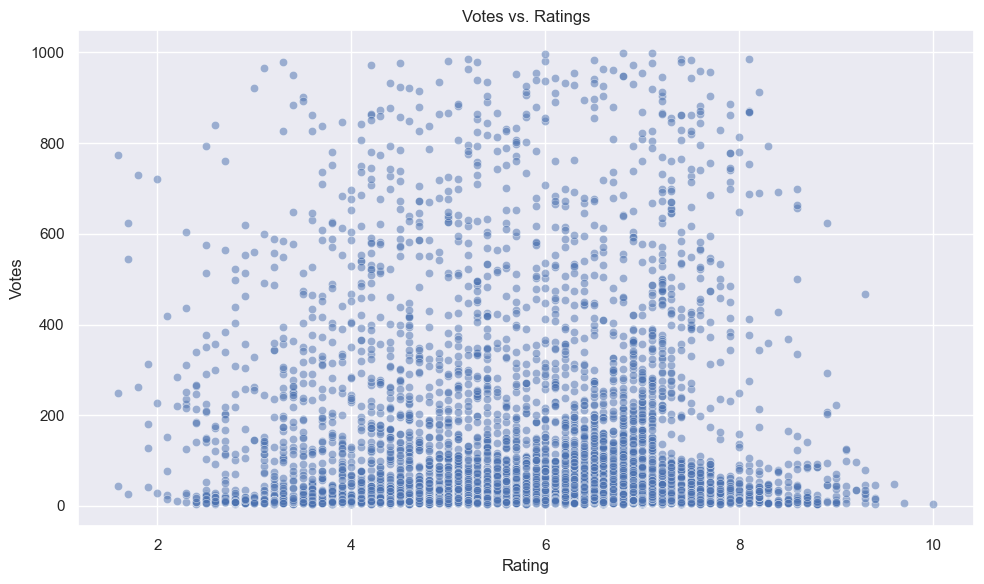

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_movie, x='Rating', y='Votes', alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Votes vs. Ratings')
plt.tight_layout()  
plt.show()

In [27]:
most_directed_director = df_movie['Director'].value_counts().idxmax()
print(most_directed_director)

Kanti Shah


In [28]:
all_actors = df_movie[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts()
most_starred_actor = all_actors.idxmax()
print(most_starred_actor)

Mithun Chakraborty
